Exercise: Multiple Linear Regression with Multiple Features

You have a dataset containing information about houses, including their square footage, number of
bedrooms, and age, along with the price of the house.

The task is to predict the price of a house based on these three features using multiple linear regression. You'll use gradient descent to find the optimal parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import  StandardScaler



In [3]:


# Dataset: Square Footage, Bedrooms, Age (years), Price (in thousands)
X = np.array([
    [1500, 3, 10],
    [1800, 4, 15],
    [2400, 3, 20],
    [3000, 5, 5],
    [3500, 4, 8],
    [4000, 5, 12]
])

Y = np.array([400, 450, 500, 600, 650, 700])  # Prices in thousands


In [4]:
#Features Scalling (Standarization Z_score Normalization)

scaler=StandardScaler()

X_norm=scaler.fit_transform(X)


# Add bias column (x0 = 1)
X_bias=np.c_[np.ones(X_norm.shape[0]),X_norm]

X_bias

array([[ 1.        , -1.34726614, -1.22474487, -0.34340141],
       [ 1.        , -1.0104496 ,  0.        ,  0.68680282],
       [ 1.        , -0.33681653, -1.22474487,  1.71700705],
       [ 1.        ,  0.33681653,  1.22474487, -1.37360564],
       [ 1.        ,  0.89817743,  0.        , -0.7554831 ],
       [ 1.        ,  1.45953832,  1.22474487,  0.06868028]])

In [57]:
# Initialize parameters

theta=np.zeros(X_bias.shape[1])
alpha=0.1
iterations=1000
m=len(Y)
cost_history=[]










In [60]:
# Gradient Descent Algorithm

for _ in range(iterations):
    y_pred=X_bias @ theta
    
    #compute mean error square
    error=y_pred-Y
    cost=(1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)
    
    # Compute gradients and update parameters
    
    gradients=(1/m) * (X_bias.T @ error)
    theta-=alpha*gradients

# Print final parameters
print(f"Final Theta Coefficients: {theta}")


y_pred


Final Theta Coefficients: [550.         100.79128643   7.77205984  -4.15416607]


array([406.11506869, 445.30239151, 499.4003053 , 599.17314822,
       643.66686051, 706.34222578])

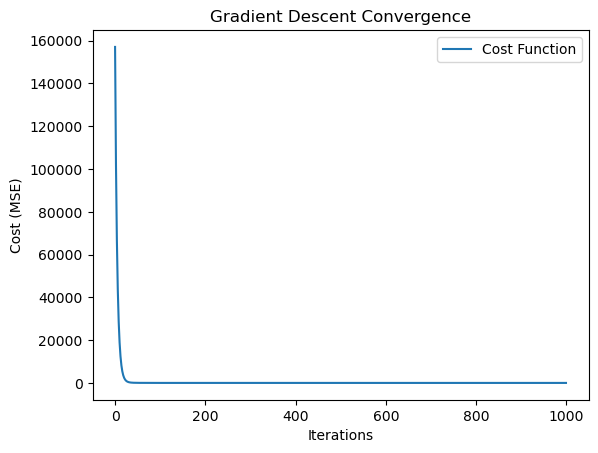

In [59]:
plt.plot(range(iterations), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [71]:
new_house=np.array([[2000,10,12]])

new_house_norm=scaler.transform(new_house)

house_bais=np.c_[np.ones(new_house.shape[0]),new_house_norm]


predictedHousePrice=house_bais @ theta

print(f"Predicted House Price: ${predictedHousePrice[0] * 1000:.2f}")

Predicted House Price: $527615.03
